<a href="https://colab.research.google.com/github/rajkumarshahu/AI-Colab/blob/main/4AI3_RajShahu_Assignment_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<center>Assignment #4 <br>SFWRTECH 4AI3:Artificial Intelligence**
**<center>|| <br> ||<br> ||**
**<center>Submitted by: Raj Kumar Shahu (ID: 400426052) <br> Date: November 7, 2023<br>**



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.ma import mean
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import log_loss
from sklearn.neural_network import MLPClassifier

#### Data Preprocessing and Visualization


In [ ]:
df = pd.read_csv('/content/train.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


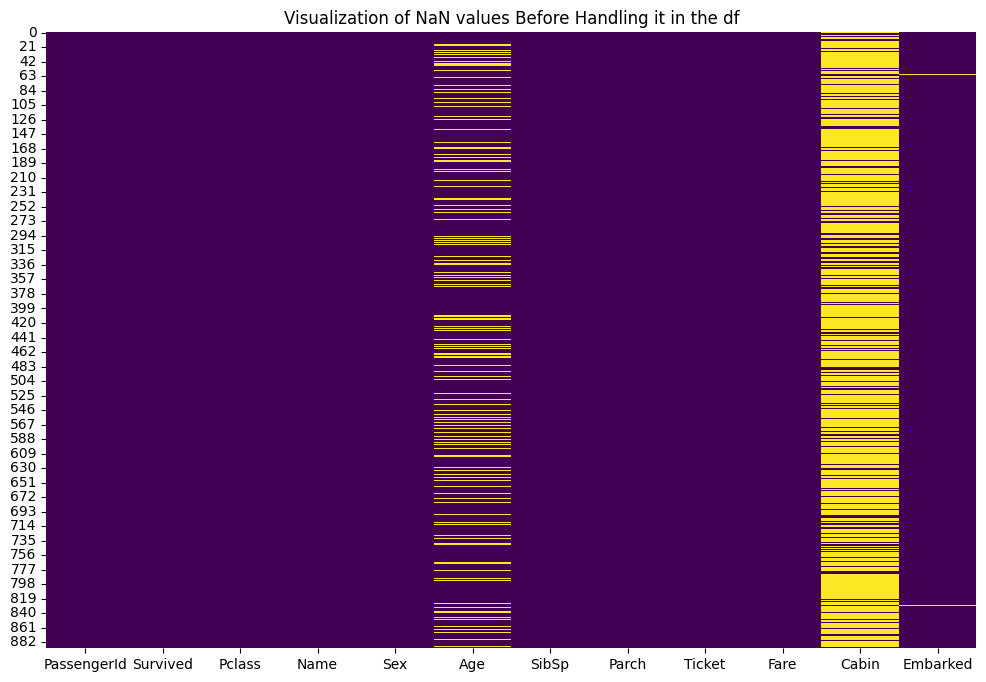

In [ ]:
# Function to visualize NaN values using a heatmap
def visualize_nans(data, message):
    plt.figure(figsize=(12, 8))
    sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
    plt.title(f'Visualization of NaN values {message} Handling it in the df')
    plt.show()
title_message = "Before"
visualize_nans(df, title_message)

##### Handling Missing Values

In [ ]:
mean_age = df['Age'].mean()
df['Age'].fillna(mean_age, inplace=True)

df['Cabin'].fillna('Unknown', inplace=True)

mode_embarked = df['Embarked'].mode()[0]
df['Embarked'].fillna(mode_embarked, inplace=True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

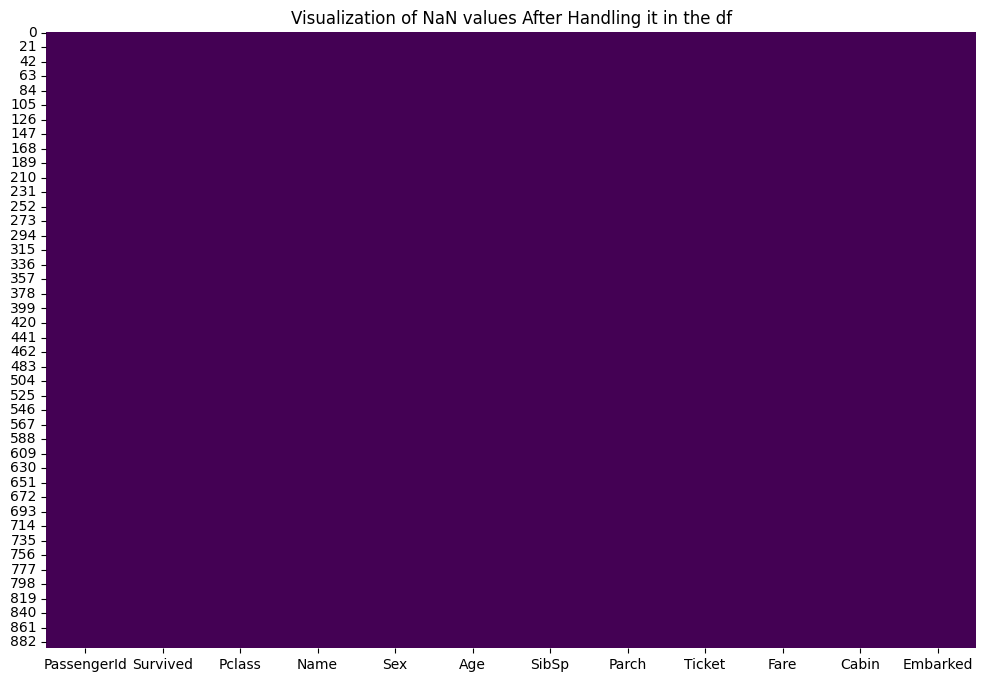

In [ ]:
title_message = "After"
visualize_nans(df, title_message)

#### <b>Logistic Regression Model

1. Add a part to the program so that age, gender and ticket class (Pclass) are considered as the input variables (features) for classifying survivors. Construct the logistic regression model and estimate the parameters of the log odd function using the first 200 data points. Print the parameters of the model.

In [ ]:
# Convert 'Sex' column to numeric values
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])

# Extract features and target variable
X = df[['Age', 'Sex', 'Pclass']].iloc[:200].fillna(0)
y = df['Survived'].iloc[:200]

# Create and fit the logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X, y)

print(log_reg.coef_, log_reg.intercept_)

[[-0.02951513 -2.48852285 -0.6455816 ]] [3.15392779]


#### <b>Log Loss Calculation for Logistic Regression

2. Calculate the value of the log-loss function in this case for the sample points 201 to 240 (average of the penalty for these 40 samples) for this model.

In [ ]:
# Extract features and target variable for samples 201 to 240
X_test = df[['Age', 'Sex', 'Pclass']].iloc[200:240].fillna(0)
y_test = df['Survived'].iloc[200:240]

# Predict probabilities for the logistic regression model
y_pred_proba = log_reg.predict_proba(X_test)

# Calculate log loss
log_loss_lr = log_loss(y_test, y_pred_proba)
print(log_loss_lr)

0.47933336692882217


#### <b>MLP Neural Network Model

3. Add one more part to the program so that the same classification is done using an MLP neural networks. Assume two hidden layers in the MLP. In each layer, the number of the neurons are 2+n, where n is the right two most digits in your MacID card. This means, for instance if your MacID card is, say, 412345648, then the first hidden layer has 4+2=6 and the second hidden layer has 8+2=10 neurons. Check both relu and sigmoid activation functions and use the one with the best accuracy (less loss) for your final network.

In [ ]:
# Define and train MLP with sigmoid activation
'''
The architecture of the MLP neural network is determined by the last two digits of my ID "400426052", which are "52":
- First hidden layer: 5 + 2 = 7 neurons
- Second hidden layer: 2 + 2 = 4 neurons
'''
mlp_sigmoid = MLPClassifier(hidden_layer_sizes=(7, 4), activation='logistic', max_iter=1000, random_state=42)
mlp_sigmoid.fit(X, y)

# Predict probabilities for the model
y_pred_proba_sigmoid = mlp_sigmoid.predict_proba(X_test)
print(y_pred_proba_sigmoid)

[[0.63278073 0.36721927]
 [0.63284791 0.36715209]
 [0.63296597 0.36703403]
 [0.63309124 0.36690876]
 [0.63191233 0.36808767]
 [0.62827803 0.37172197]
 [0.63291889 0.36708111]
 [0.63268112 0.36731888]
 [0.63231266 0.36768734]
 [0.6330272  0.3669728 ]
 [0.6325535  0.3674465 ]
 [0.63302707 0.36697293]
 [0.63239006 0.36760994]
 [0.6328071  0.3671929 ]
 [0.63284791 0.36715209]
 [0.63291997 0.36708003]
 [0.63291434 0.36708566]
 [0.63306111 0.36693889]
 [0.63294545 0.36705455]
 [0.6328071  0.3671929 ]
 [0.63156726 0.36843274]
 [0.63265475 0.36734525]
 [0.63311013 0.36688987]
 [0.63284791 0.36715209]
 [0.63299646 0.36700354]
 [0.63239006 0.36760994]
 [0.63180643 0.36819357]
 [0.63223803 0.36776197]
 [0.6316268  0.3683732 ]
 [0.63297348 0.36702652]
 [0.6330047  0.3669953 ]
 [0.63282198 0.36717802]
 [0.63312113 0.36687887]
 [0.62944669 0.37055331]
 [0.63243131 0.36756869]
 [0.63297348 0.36702652]
 [0.6330766  0.3669234 ]
 [0.62981486 0.37018514]
 [0.63180643 0.36819357]
 [0.63291074 0.36708926]]

#### <b>Log Loss Calculation for NN Model

4. Calculate and print the value of the loss function for the NN model.

In [ ]:
log_loss_mlp  = log_loss(y_test, y_pred_proba_sigmoid)
print(log_loss_mlp)

0.6477453348170445
